In [1]:
import pandas as pd
import numpy as np
import os
import re
import time
import datetime
import gc
import string
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

from decimal import Decimal, getcontext

# --------------------------------------------

output_dir = r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25"

Charge1 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\1. C1_1.0_C2_1.0\91. Sigma_&_Charge_MD.csv',sep='\t')
Charge2 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\2. C1_1.0_C2_0.75\91. Sigma_&_Charge_MD.csv',sep='\t')
Charge3 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\3. C1_1.0_C2_0.5\91. Sigma_&_Charge_MD.csv',sep='\t')
Charge4 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\4. C1_1.0_C2_0.25\91. Sigma_&_Charge_MD.csv',sep='\t')
Charge5 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\5. C1_1.0_C2_0.0\91. Sigma_&_Charge_MD.csv',sep='\t')
Charge6 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\6. C1_1.0_C2_-0.25\91. Sigma_&_Charge_MD.csv',sep='\t')
Charge7 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\7. C1_1.0_C2_-0.5\91. Sigma_&_Charge_MD.csv',sep='\t')
Charge8 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\8. C1_1.0_C2_-0.75\91. Sigma_&_Charge_MD.csv',sep='\t')
Charge9 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\15. Paper Simulations\1. LG Thermostat\1. Two_Disk_Variable_Charge\1. T_0.25\9. C1_1.0_C2_-1.0\91. Sigma_&_Charge_MD.csv',sep='\t')

# --------------------------------------------

Charge1 = Charge1.filter(['u/R','q/Q'])
Charge2 = Charge2.filter(['u/R','q/Q'])
Charge3 = Charge3.filter(['u/R','q/Q'])
Charge4 = Charge4.filter(['u/R','q/Q'])
Charge5 = Charge5.filter(['u/R','q/Q'])
Charge6 = Charge6.filter(['u/R','q/Q'])
Charge7 = Charge7.filter(['u/R','q/Q'])
Charge8 = Charge8.filter(['u/R','q/Q'])
Charge9 = Charge9.filter(['u/R','q/Q'])

In [2]:
# Renombrar la columna 'Charge' en cada dataframe
Charge1 = Charge1.rename(columns={'q/Q': 'q/Q_1.0'})
Charge2 = Charge2.rename(columns={'q/Q': 'q/Q_0.75'})
Charge3 = Charge3.rename(columns={'q/Q': 'q/Q_0.50'})
Charge4 = Charge4.rename(columns={'q/Q': 'q/Q_0.25'})
Charge5 = Charge5.rename(columns={'q/Q': 'q/Q_0.0'})
Charge6 = Charge6.rename(columns={'q/Q': 'q/Q_-0.25'})
Charge7 = Charge7.rename(columns={'q/Q': 'q/Q_-0.50'})
Charge8 = Charge8.rename(columns={'q/Q': 'q/Q_-0.75'})
Charge9 = Charge9.rename(columns={'q/Q': 'q/Q_-1.0'})

# Unir los dataframes utilizando un left join
Charge_Total = Charge1.merge(Charge2, on='u/R', how='left').merge(Charge3, on='u/R', how='left').merge(Charge4, on='u/R', how='left').merge(Charge5, on='u/R', how='left').merge(Charge6, on='u/R', how='left').merge(Charge7, on='u/R', how='left').merge(Charge8, on='u/R', how='left').merge(Charge9, on='u/R', how='left')
Charge_Total.to_csv(os.path.join(output_dir, f"Charge_Join.csv"), sep='\t', index=False)



del Charge1,Charge2,Charge3,Charge4,Charge5,Charge6,Charge7,Charge8,Charge9

q/Q_1.0
q/Q_0.75
q/Q_0.50
q/Q_0.25
q/Q_0.0
q/Q_-0.25
q/Q_-0.50
q/Q_-0.75
q/Q_-1.0


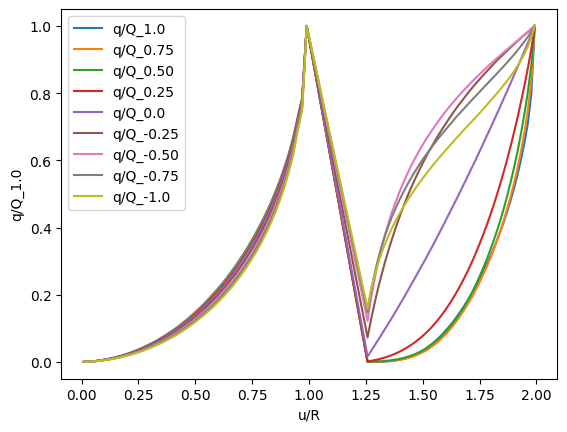

In [3]:
valores_C = ['q/Q_1.0','q/Q_0.75','q/Q_0.50','q/Q_0.25','q/Q_0.0','q/Q_-0.25','q/Q_-0.50','q/Q_-0.75','q/Q_-1.0']

for C in valores_C:
    print(C)
    columna_carga = f'{C}'
    sns.lineplot(data=Charge_Total, x='u/R', y=columna_carga, label=f'{C}')
    
plt.savefig(os.path.join(output_dir, "Charge_Join.png"))